In [45]:
#Importing pyhton libraries
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
#Add additional libraries below this line
import seaborn as sns
from matplotlib import pyplot as plt
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20


In [46]:
#Defining the url for the dataset
urlds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Sp22/Team4_Electric_Vehicle_Population_Data.zip"

#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.
csvdata=requests.get(urlds,verify=False).content  #this will generate a warning but you can proceed

zf = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed. 
#It might take a while for all of the data to be accessed. Be patient.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [47]:
#Opening the dataset file and reading it into a data frame called "data"
data=pd.read_csv(zf.open("Team4_Electric_Vehicle_Population_Data.csv"))

In [48]:
#Defining the url for the dataset 2
urlds2="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Sp22/Electric_Vehicle_Population_Size_History_By_County.zip"
#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.
csvdata2=requests.get(urlds2,verify=False).content  #this will generate a warning but you can proceed

zf2 = ZipFile(BytesIO(csvdata2),'r')  #The dataset is being accessed from a zip file so this step is needed. 
#It might take a while for all of the data to be accessed. Be patient.

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [49]:
#Opening the dataset 2 file and reading it into a data frame called "data2"
data2=pd.read_csv(zf2.open("Electric_Vehicle_Population_Size_History_By_County.csv"))

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         91933 non-null  object 
 1   County                                             91925 non-null  object 
 2   City                                               91933 non-null  object 
 3   State                                              91933 non-null  object 
 4   ZIP Code                                           91933 non-null  int64  
 5   Model Year                                         91933 non-null  int64  
 6   Make                                               91933 non-null  object 
 7   Model                                              91916 non-null  object 
 8   Electric Vehicle Type                              91933 non-null  object 
 9   Clean 

In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13175 entries, 0 to 13174
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      13175 non-null  object 
 1   County                                    12960 non-null  object 
 2   State                                     13030 non-null  object 
 3   Vehicle Primary Use                       13175 non-null  object 
 4   Battery Electric Vehicles (BEVs)          13175 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  13175 non-null  int64  
 6   Electric Vehicle (EV) Total               13175 non-null  int64  
 7   Non-Electric Vehicle Total                13175 non-null  int64  
 8   Total Vehicles                            13175 non-null  int64  
 9   Percent Electric Vehicles                 13175 non-null  float64
dtypes: float64(1), int64(5), object(4)

# Cleaning the Dataset 1

In [52]:
data.head() # Previewing the dataset 1.

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC


In [53]:
data.drop(data[data['State'] != "WA"].index, inplace = True) 
# Dropping the data which is not from the State of Washington.
data.head() # 91933 rows were there which have now been reduced to 91686.

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC
5,5YJ3E1EB0K,Snohomish,EDMONDS,WA,98026,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,21.0,332383208,POINT (-122.333046 47.829439),PUGET SOUND ENERGY INC


In [54]:
data.drop(['VIN (1-10)', 'ZIP Code', 'Vehicle Location', 'Legislative District','DOL Vehicle ID'], axis = 1, inplace = True)
data

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,Thurston,TENINO,WA,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,PUGET SOUND ENERGY INC
1,Snohomish,MUKILTEO,WA,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,PUGET SOUND ENERGY INC
3,Thurston,LACEY,WA,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,PUGET SOUND ENERGY INC
4,Skagit,MOUNT VERNON,WA,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,PUGET SOUND ENERGY INC
5,Snohomish,EDMONDS,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...
91928,Pierce,GIG HARBOR,WA,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
91929,Snohomish,BOTHELL,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC
91930,Snohomish,LAKE STEVENS,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,PUGET SOUND ENERGY INC
91931,King,FEDERAL WAY,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [55]:
data.sort_values(by=['Model Year'], inplace=True)# Sorting the data based on the year in which the car was registered.
data.head()


,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
40764,Thurston,TUMWATER,WA,1993,DODGE,CARAVAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,80,0,PUGET SOUND ENERGY INC
10193,Clallam,SEQUIM,WA,1998,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
79387,Skagit,MOUNT VERNON,WA,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,PUGET SOUND ENERGY INC
73332,King,REDMOND,WA,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
31862,King,SEATTLE,WA,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91686 entries, 40764 to 13898
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   County                                             91686 non-null  object
 1   City                                               91686 non-null  object
 2   State                                              91686 non-null  object
 3   Model Year                                         91686 non-null  int64 
 4   Make                                               91686 non-null  object
 5   Model                                              91669 non-null  object
 6   Electric Vehicle Type                              91686 non-null  object
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  91686 non-null  object
 8   Electric Range                                     91686 non-null  int64 
 9   Base MSRP    

# Cleaning the Dataset 2

In [57]:
data2.head() # Previewing the dataset 2

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,January 31 2017,NaN,NaN,Passenger,9,4,13,2597,2610,0.50
1,January 31 2017,NaN,WA,Truck,0,0,0,1,1,0.00
2,January 31 2017,NaN,CA,Passenger,1,0,1,469,470,0.21
3,January 31 2017,Adams,WA,Truck,0,0,0,5283,5283,0.00
4,January 31 2017,Adams,WA,Passenger,2,1,3,12501,12504,0.02


In [58]:
data2.drop(['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)'], axis = 1, inplace = True)
data2

,Date,County,State,Vehicle Primary Use,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,January 31 2017,NaN,NaN,Passenger,13,2597,2610,0.50
1,January 31 2017,NaN,WA,Truck,0,1,1,0.00
2,January 31 2017,NaN,CA,Passenger,1,469,470,0.21
3,January 31 2017,Adams,WA,Truck,0,5283,5283,0.00
4,January 31 2017,Adams,WA,Passenger,3,12501,12504,0.02
...,...,...,...,...,...,...,...,...
13170,February 28 2022,Skamania,WA,Truck,0,3856,3856,0.00
13171,February 28 2022,Spokane,WA,Passenger,2182,317909,320091,0.68
13172,February 28 2022,Wahkiakum,WA,Truck,0,1764,1764,0.00
13173,February 28 2022,Walla Walla,WA,Passenger,242,35324,35566,0.68


In [59]:
data2.drop(data2[data2['Vehicle Primary Use'] == "Truck"].index, inplace = True) 
data2 # We are only focussing on passenger vehicles and so dropping trucks.

,Date,County,State,Vehicle Primary Use,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,January 31 2017,NaN,NaN,Passenger,13,2597,2610,0.50
2,January 31 2017,NaN,CA,Passenger,1,469,470,0.21
4,January 31 2017,Adams,WA,Passenger,3,12501,12504,0.02
5,January 31 2017,Allegheny,PA,Passenger,1,89,90,1.11
6,January 31 2017,Anne Arundel,MD,Passenger,2,516,518,0.39
...,...,...,...,...,...,...,...,...
13167,February 28 2022,Saint Marys,MD,Passenger,2,137,139,1.44
13168,February 28 2022,San Diego,CA,Passenger,22,2033,2055,1.07
13169,February 28 2022,San Francisco,CA,Passenger,1,55,56,1.79
13171,February 28 2022,Spokane,WA,Passenger,2182,317909,320091,0.68


In [60]:
data2 = data2[data2['State'].notna()]
data2 # Taking into consideration only those rows whose State is known to us.

,Date,County,State,Vehicle Primary Use,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
2,January 31 2017,NaN,CA,Passenger,1,469,470,0.21
4,January 31 2017,Adams,WA,Passenger,3,12501,12504,0.02
5,January 31 2017,Allegheny,PA,Passenger,1,89,90,1.11
6,January 31 2017,Anne Arundel,MD,Passenger,2,516,518,0.39
7,January 31 2017,Alameda,CA,Passenger,7,389,396,1.77
...,...,...,...,...,...,...,...,...
13167,February 28 2022,Saint Marys,MD,Passenger,2,137,139,1.44
13168,February 28 2022,San Diego,CA,Passenger,22,2033,2055,1.07
13169,February 28 2022,San Francisco,CA,Passenger,1,55,56,1.79
13171,February 28 2022,Spokane,WA,Passenger,2182,317909,320091,0.68


In [61]:
data2['Date'] = pd.to_datetime(data2['Date'])

/tmp/ipykernel_54/775143399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Date'] = pd.to_datetime(data2['Date'])


In [62]:
data2.set_index("Date",inplace=True) # Indexing dataset by date.

In [63]:
data2.tail()

,County,State,Vehicle Primary Use,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
Date,,,,,,,
2022-02-28,Saint Marys,MD,Passenger,2,137,139,1.44
2022-02-28,San Diego,CA,Passenger,22,2033,2055,1.07
2022-02-28,San Francisco,CA,Passenger,1,55,56,1.79
2022-02-28,Spokane,WA,Passenger,2182,317909,320091,0.68
2022-02-28,Walla Walla,WA,Passenger,242,35324,35566,0.68


In [64]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10549 entries, 2017-01-31 to 2022-02-28
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   County                       10441 non-null  object 
 1   State                        10549 non-null  object 
 2   Vehicle Primary Use          10549 non-null  object 
 3   Electric Vehicle (EV) Total  10549 non-null  int64  
 4   Non-Electric Vehicle Total   10549 non-null  int64  
 5   Total Vehicles               10549 non-null  int64  
 6   Percent Electric Vehicles    10549 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 659.3+ KB


# Exploratory Data Analysis

## Finding the best car based on range the car can travel in a single charge. 

In [65]:
# max electric range for each car make.
max_range = data.groupby('Model').max()[['Electric Range']].sort_values('Electric Range', ascending=False)
max_range[:10]

/tmp/ipykernel_54/1207029463.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_range = data.groupby('Model').max()[['Electric Range']].sort_values('Electric Range', ascending=False)


,Electric Range
Model,
MODEL S,337
MODEL 3,322
MODEL X,293
MODEL Y,291
BOLT EV,259
KONA,258
ROADSTER,245
NIRO,239
NIRO ELECTRIC,239


### Tesla Model S has the maximum electric range and it can travel a maximum total of 337 miles in a single charge.

## Increase in demand of EV’s by finding the total number of cars sold in every year.

In [66]:
#Increase in demand of EV’s by finding the total number of cars sold in every year.
cars_sold_by_year= data.pivot_table(index = ['Model Year'], aggfunc ='size')
cars_sold_by_year

Model Year
1993        1
1998        1
1999        2
2000        9
2002        2
2008       24
2010       24
2011      866
2012     1719
2013     4788
2014     3764
2015     4990
2016     6291
2017     9691
2018    13992
2019    10518
2020    10748
2021    18696
2022     5560
dtype: int64

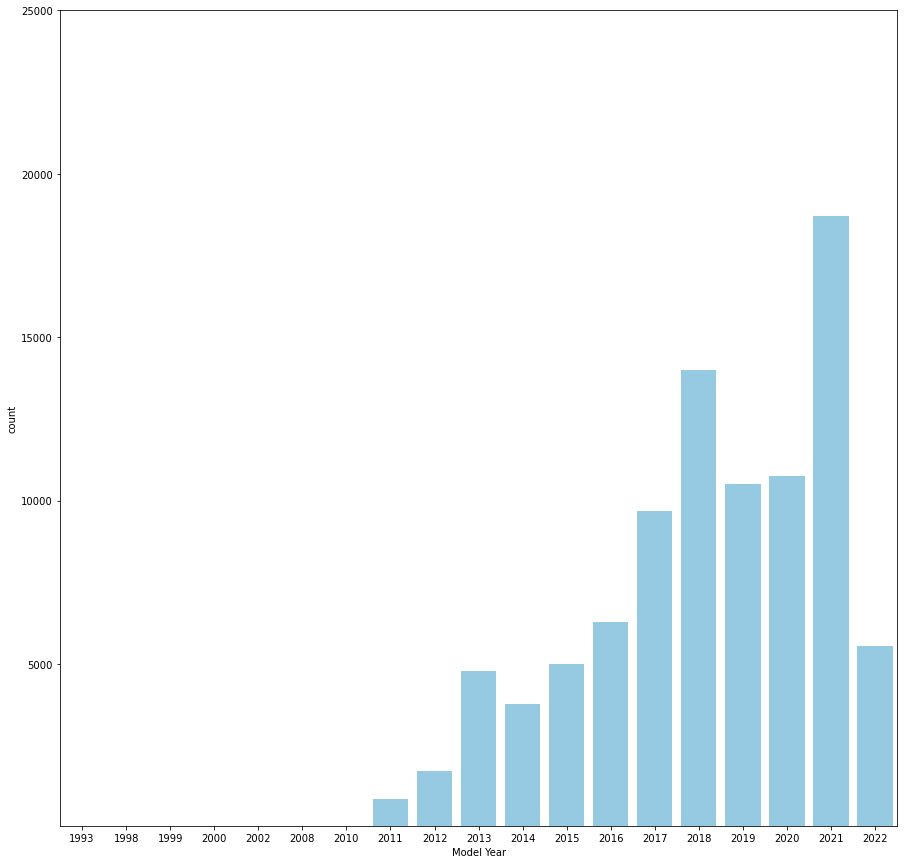

In [67]:
# Plotting the graph for increase in demand of EV's.
plt.figure(figsize=(15,15))
ax = sns.countplot(x="Model Year", data=data,palette= ["#89CFF0"])
plt.ylim(50, 25000)
plt.savefig('increase_demand.png')

### With the data from this graph, it is obvious that demand for electric vehicles has increased since 2011, but has decreased in 2014. In 2015, demand for electric vehicles began to rise again until 2018, when it declined again in 2019. Electric vehicle sales peaked in 2021, reaching their highest level since 1993.

## Top counties for Electric vehicle registration

In [68]:
# Finding the top counties which has the most number of Electric Vehicles registered.
top_counties = data.groupby('County').count()[['Model']].sort_values('Model', ascending=False).head(5)
top_counties


,Model
County,
King,47913
Snohomish,9878
Pierce,6962
Clark,5305
Thurston,3450


### According to this table, residents of King County in Washington purchased the most electric vehicles, followed by Snohomish, Pierce, Clark, and Thurston counties. As a result, electric vehicles are the most popular in King County.


## Most popular car brand for Electric Vehicles.

In [69]:
# List of top 5 brands manufacturing EVs
data['Make'].value_counts()[:5]

TESLA        39689
NISSAN       12419
CHEVROLET     9467
FORD          5503
KIA           4315
Name: Make, dtype: int64

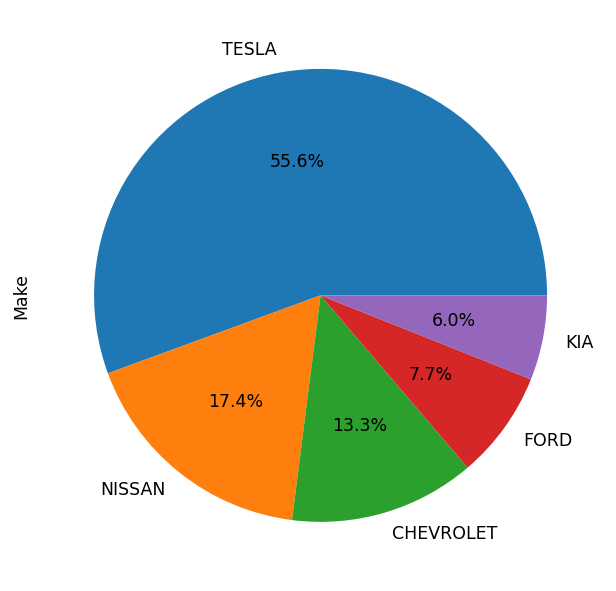

In [70]:
# Pie chart showing the top 5 brands manufacturing electric vehicles.
fig = plt.figure(figsize=(6,6), dpi=125)
ax = plt.subplot(111)
data['Make'].value_counts()[:5].plot(kind = 'pie', ax=ax, autopct='%1.1f%%', startangle=0, fontsize=10)
plt.savefig('Brand_pie.png')

### This pie chart shows that more than 50% Electric Vehicles that were registered in the state of Washington were manufactured by Tesla and hence, Tesla is the most preferred choice of Electric Vehicle brand. The second most preferred brand is Nissan followed by Cherolet, Ford and Kia.

## Determining which model Washington residents prefer to buy

In [71]:
count= data.pivot_table(index = ['Model'], aggfunc ='size')
count = count.sort_values(ascending = False)
count.head()

Model
MODEL 3    18812
LEAF       12419
MODEL Y    10716
MODEL S     6718
VOLT        4903
dtype: int64

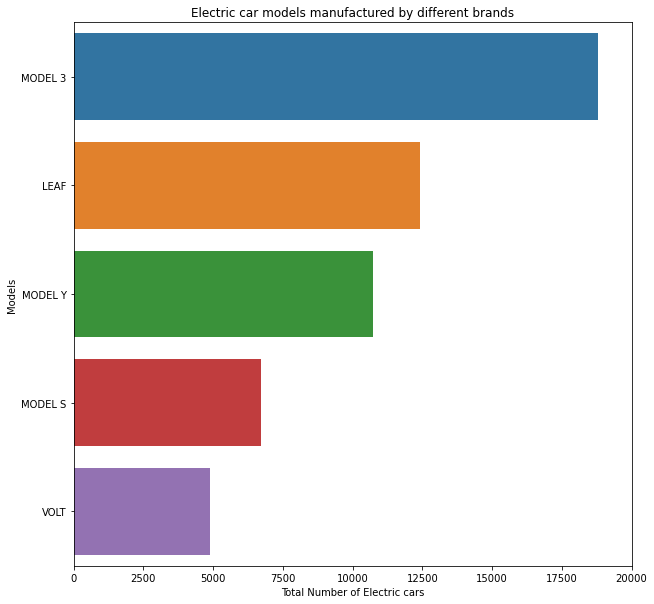

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(x = count.values[:5], y= count.index[:5])
plt.xlim(xmin=0,xmax=20000)
plt.title('Electric car models manufactured by different brands')
plt.ylabel('Models')
plt.xlabel('Total Number of Electric cars')
plt.show()
plt.savefig('pref_model.png')

### With the help of this graph it is clear that Tesla Model 3 is the most popular in the state of Washington. 

## Correlation between the Columns to find the highly correlated columns

In [73]:
correlation_matrix = data.corr()
correlation_matrix

,Model Year,Electric Range,Base MSRP
Model Year,1.000000,-0.078768,-0.219991
Electric Range,-0.078768,1.000000,0.051839
Base MSRP,-0.219991,0.051839,1.000000


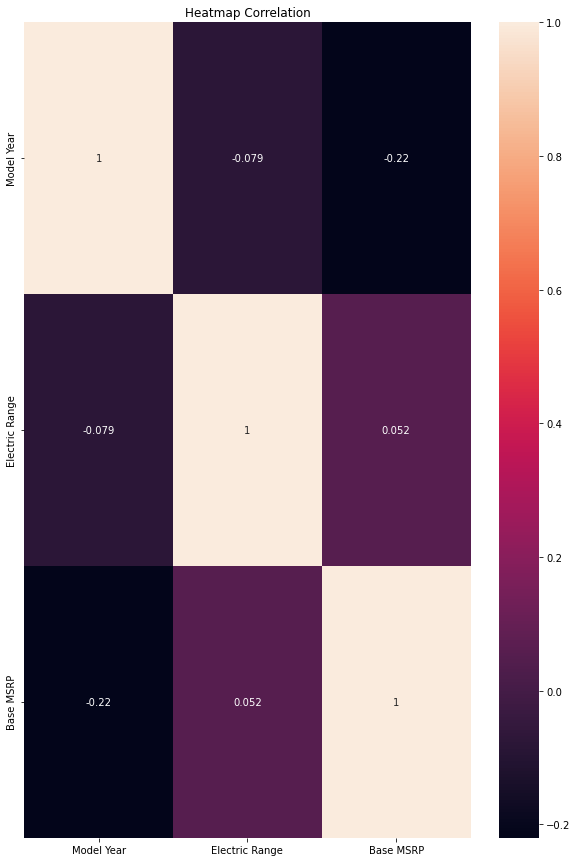

In [74]:
plt.figure(figsize=(10,15))
sns.heatmap(data.corr(), annot=True)
plt.title('Heatmap Correlation')
plt.savefig('Heatmap.png')

In [75]:
correlation_matrix = data2.corr()
correlation_matrix

,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
Electric Vehicle (EV) Total,1.000000,0.880178,0.884223,-0.027133
Non-Electric Vehicle Total,0.880178,1.000000,0.999963,-0.059074
Total Vehicles,0.884223,0.999963,1.000000,-0.058622
Percent Electric Vehicles,-0.027133,-0.059074,-0.058622,1.000000


Text(0.5, 1.0, 'Heatmap Correlation')

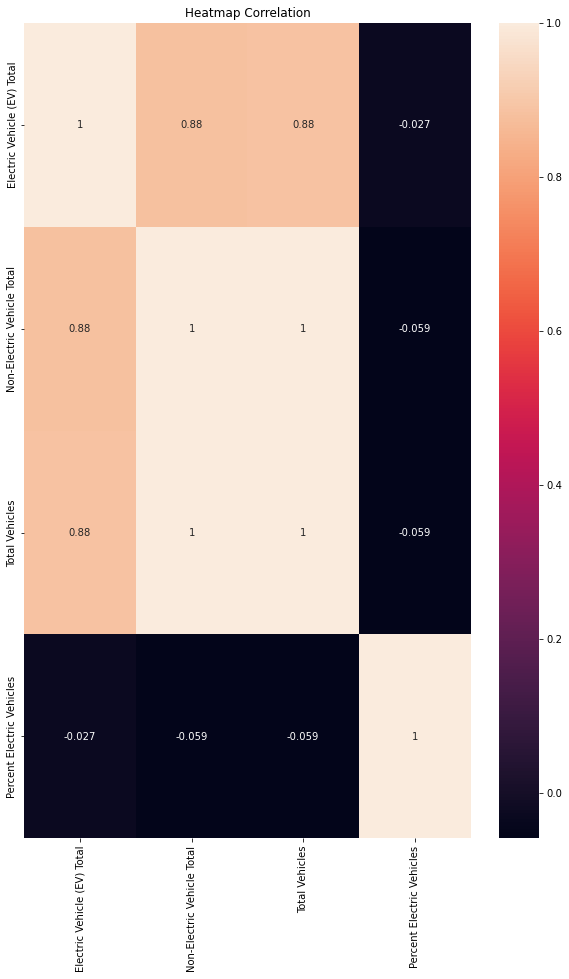

In [76]:
plt.figure(figsize=(10,15))
sns.heatmap(data2.corr(), annot=True)
plt.title('Heatmap Correlation')
#plt.savefig('Heatmap2.png')

## Relation between Electric Vehicle type and the range.

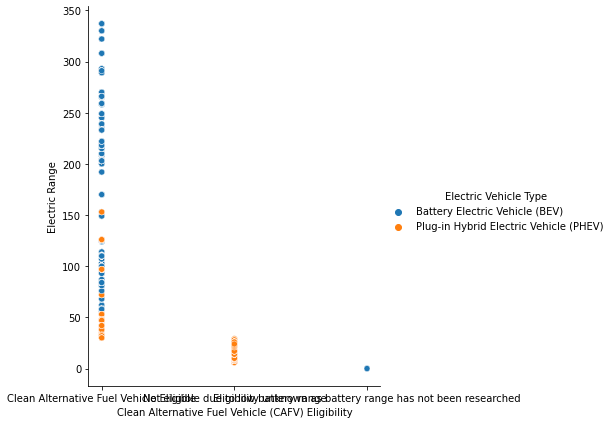

In [77]:
sns.relplot(x="Clean Alternative Fuel Vehicle (CAFV) Eligibility", y="Electric Range",height=6, 
            hue="Electric Vehicle Type",data=data)
plt.savefig('relation.png')


### With the help of this plot, it is clear that  mostly Battery Electric Vehicles are satify the Clean Alternative Fuel Vehicle criteria.

## Car brands with similar Electric Range.

In [78]:
avg_range = data.groupby('Make').mean()[['Electric Range']].sort_values('Electric Range', ascending = False).head()
avg_range

,Electric Range
Make,
JAGUAR,216.450000
TESLA,152.871199
CHEVROLET,122.516425
POLESTAR,114.400901
WHEEGO ELECTRIC CARS,100.000000


### Calculating the average electric ranges of cars manufactured by different Brands and printing the top 5 brands with highest average range.

## Analyzing which states has most number of Electric Vehicles registration.

### Using the dataset 2 as it has data of all the states in the US.

In [79]:
data2.head()

,County,State,Vehicle Primary Use,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
Date,,,,,,,
2017-01-31,NaN,CA,Passenger,1,469,470,0.21
2017-01-31,Adams,WA,Passenger,3,12501,12504,0.02
2017-01-31,Allegheny,PA,Passenger,1,89,90,1.11
2017-01-31,Anne Arundel,MD,Passenger,2,516,518,0.39
2017-01-31,Alameda,CA,Passenger,7,389,396,1.77


In [80]:
ddf=data2.groupby('State').sum()[['Electric Vehicle (EV) Total']].reset_index()
ddf
# Taking sum of Electric Vehicles sold across all the states in the US.

,State,Electric Vehicle (EV) Total
0,AK,90
1,AL,120
2,AR,11
3,AZ,525
4,CA,3653
...,...,...
36,TX,1009
37,UT,45
38,VA,1700
39,WA,3207452


### We can see that the state of Washington has the highest EVs registered followed by California. Arkansas has the least number of EV's.

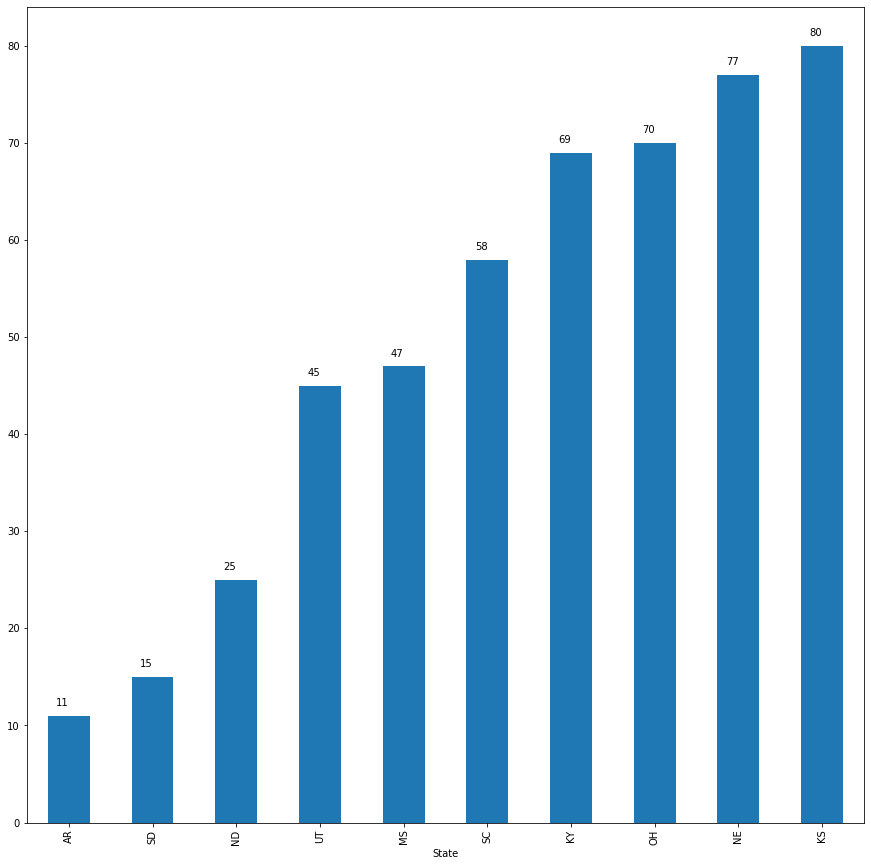

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize=(15,15))
ddf = data2.groupby(["State"])["Electric Vehicle (EV) Total"].sum()
ax = ddf.sort_values(ascending = True )[:10].plot.bar()
# Plotting  10 states with least number of Electric Vehicles registration in the ascending order.
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) # Printing the values on top of the bar.
plt.show()
plt.savefig('salesstate.png')


### Total sales of Electric Vehicles across United States

In [82]:
monthly_sales = data2['Electric Vehicle (EV) Total'].resample('m').sum()# Resampling 
monthly_sales

Date
2017-01-31    22713
2017-02-28    23434
2017-03-31    24156
2017-04-30    24966
2017-05-31    25689
              ...  
2021-10-31    83595
2021-11-30    85335
2021-12-31    86609
2022-01-31    88066
2022-02-28    89445
Freq: M, Name: Electric Vehicle (EV) Total, Length: 62, dtype: int64

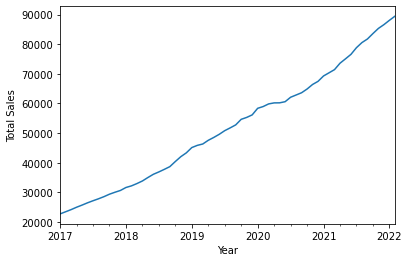

In [83]:
monthly_sales = data2['Electric Vehicle (EV) Total'].resample('m').sum() 
monthly_sales.plot()
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.savefig('US_Sales".png')

### We can see that from 2017, the sales of Electric Vehicles has increased across the United States.